In [65]:
import pandas as pd

df = pd.read_csv('~/development/greatwall/data/data_clean.csv')
annual_aggregates = df.groupby(['year'])['price_clean'].agg(['mean', 'sum', 'count'])
annual_aggregates.reset_index(level=0, inplace=True)

Text(0.5,1,'Annual Volume of NPL Disposal Auctions')

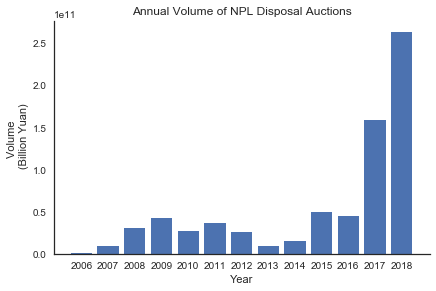

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

sns.set()
sns.set_style('white')
plt.bar(annual_aggregates['year'],annual_aggregates['sum'])
sns.despine()
plt.xlabel('Year')
plt.ylabel('Volume \n (Billion Yuan)') # this isn't right, needs right units
plt.title('Annual Volume of NPL Disposal Auctions')



In [63]:
# Volume by Region

df_regions = df.groupby(['region'])['price_clean'].agg(['sum'])
df_regions = df_regions.reset_index()
df_regions['total'] = df_regions['sum'].sum()
df_regions['share_of_total'] = df_regions['sum']/df_regions['total']
df_regions

,region,sum,total,share_of_total
0,Autonomous West,6.682391e+10,7.039425e+11,0.094928
1,Populous Middle,5.183170e+10,7.039425e+11,0.073631
2,Prosperous Coast,3.350865e+11,7.039425e+11,0.476014
3,Rust Belt,2.502004e+11,7.039425e+11,0.355427


In [9]:
# Get total price per year

df.groupby(['year'])['price_clean'].agg(['mean', 'sum', 'count']).tail()

,mean,sum,count
year,,,
2014,9.143122e+07,1.508615e+10,165
2015,1.441281e+08,4.900356e+10,340
2016,1.725841e+08,4.504445e+10,261
2017,2.527477e+08,1.584728e+11,627
2018,3.118749e+08,2.635343e+11,845


In [11]:
# Issuance by Province

npl_by_city = pd.DataFrame(df[df['year'] == '2018'].groupby(['CityName'])['price_clean'].sum())

npl_by_city.sort_values(by = 'price_clean', ascending = False).head()

,price_clean
CityName,
北京,1.570759e+11
广西,1.954609e+10
云南,1.632147e+10
辽宁,1.488219e+10
四川,1.000652e+10


In [100]:
# Issuance By Sector

npl_by_sector = pd.DataFrame(df[df['year'] == '2018'].groupby(['TradeName'])['price_clean'].sum())

npl_by_sector.sort_values(by = 'price_clean', ascending = False).head()

,price_clean
TradeName,
无,1.704118e+11
其他,4.502538e+10
房地产业,2.532575e+10
批发和零售业,1.022251e+10
制造业\r\n,6.247131e+09
